In [1]:
import json
import glob

def lire_json(chemin):
    with open(chemin, "r", encoding="utf-8") as fin:
        dic = json.load(fin)
    return dic

def ecrire_json(chemin, dic):
    with open(chemin, "w", encoding="utf-8") as fout:
        fout.write(json.dumps(dic, ensure_ascii=False, indent=2))

In [2]:
with open("articlesTags.json", "r", encoding="utf-8") as fin:
    dic = json.load(fin)

print(len(dic))

5685


In [37]:
new_dic = {}

for k, v in dic.items():
    mots = []
    tags = []
    for mot, tag in v[1]:
        mots.append(mot)
        tags.append(tag)
    new_dic[k] = []
    new_dic[k].append(mots)
    new_dic[k].append(tags)
    new_dic[k].append(v[0])
    
print(len(new_dic))

for k, v in new_dic.items():
    print(k, v)
    break

5685
french-docs/2009\01\01\20090101_Elmoudjahid_69e98e7fc33abc878f8cfb6bd32fe498 [['Identification', 'de', 'trois', 'gènes', 'expliquant', 'la', 'virulence', 'de', 'la', 'grippe', 'espagnole', 'de', '1918'], ['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD'], 'Identification de trois gènes expliquant la virulence de la grippe espagnole de 1918']


In [38]:
articles = [x for x in new_dic.keys()]
print(articles[0])

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

print(liste_tags[:3])
print(liste_titres[:3])

french-docs/2009\01\01\20090101_Elmoudjahid_69e98e7fc33abc878f8cfb6bd32fe498
[['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD'], ['NNP', 'NNS', 'VBP', 'NN', ':', 'IN', 'NNS', 'VBP', 'JJR', 'NN', 'NN', 'NN', 'JJ', 'NN'], ['NNP', 'FW', 'FW', '.', 'NNS', 'NNS', ':']]
['Identification de trois gènes expliquant la virulence de la grippe espagnole de 1918', 'Les chantiers du Président : On ne peut cacher le soleil avec un tamis', 'Gueule de bois ? Quelques remèdes...']


In [46]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

nb_clusters = 7

model = KMeans(n_clusters=nb_clusters)

V = CountVectorizer()

liste_t = [" ".join(x) for x in liste_tags]

print(liste_tags[0])
print(liste_t[:3])

X = V.fit_transform(liste_t).toarray()

print(X[:3])
print(len(X))
print(X[0])

['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD']
['NNP FW FW NNS VBP JJ NN IN FW JJ FW IN CD', 'NNP NNS VBP NN : IN NNS VBP JJR NN NN NN JJ NN', 'NNP FW FW . NNS NNS :']
[[0 1 0 0 4 2 2 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 1 0 0 5 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
5685
[0 1 0 0 4 2 2 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [15]:
model.fit(X)

all_predictions = model.predict(X)

print(all_predictions[:100])

[6 2 0 0 5 5 0 5 3 3 1 6 0 5 0 2 2 0 5 0 2 2 2 2 6 0 6 2 2 3 2 3 5 6 3 0 5
 3 5 5 3 5 5 5 3 0 5 0 6 2 0 3 0 2 3 2 6 5 2 6 0 6 3 2 0 0 2 0 5 0 6 5 0 2
 2 6 3 5 3 6 6 6 0 5 6 2 0 0 0 5 5 0 0 6 5 5 5 0 5 5]


In [98]:
from random import randint

dic_res = {}

for i in range(len(X)):
    #print(X[i])
    num_cluster = all_predictions[i]
    titre = liste_titres[i]
    tags = liste_t[i]
    #vecteur = X[i]
    dic_res.setdefault(num_cluster,  [])
    dic_res[num_cluster].append((titre, tags, vecteur))

echantillons = []

taille_echantillons = 5
    
for i in range(nb_clusters):
    echantillons.append([])
    #print(len(dic_res[i]))
    for j in range(taille_echantillons):
        indice = randint(0, len(dic_res[i]))
        #print(indice)
        echantillons[i].append(dic_res[i][indice][:1])

In [99]:
for i in range(len(echantillons)):
    print("Cluster %s" % i)
    for titre in echantillons[i]:
        print(titre)
    print("-"*10)

Cluster 0
('Afrique en marche',)
("L'Irlande rappelle tous ses produits à base de porc",)
("Elections provinciales en Irak: 15 millions d'Irakiens ont commencé à voter",)
('50 morts en 2008 sur les routes du Tarn',)
('Polio: La communauté internationale alloue plus de 630 millions de dollars',)
----------
Cluster 1
("Une ONG israélienne publie des faire-part de décès denfants palestiniens Al Qods occupée (AFP)  L'un des plus importants organismes de défense des droits de l'Homme israéliens a publié hier une pleine page de faire-part de décès d'enfants palestiniens victimes de tirs israéliens, dans le quotidien Haaretz .",)
("Une mue qualitative et quantitative du programme de planning familial M. Mondher Zenaïdi, ministre de la Santé publique, a mis l'accent sur l'intérêt accordé à la santé reproductive dans le cadre de la politique démographique et sanitaire tunisienne.",)
('Températures maximales pré-printanières et du sable du Sahara Ne soyez pas pris de court si, de bon matin, le p

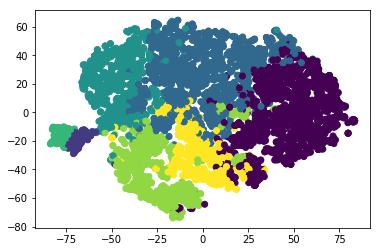

In [67]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Defining Model
model_tsne = TSNE(learning_rate=100)

# Fitting Model
transformed = model_tsne.fit_transform(X)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=all_predictions)
plt.savefig("test.png")
plt.show()

0
